In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Fuel Consumption Curve

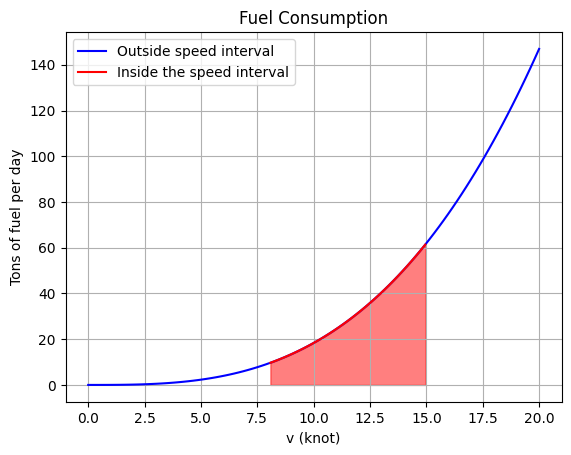

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create a vector of velocities
v = np.linspace(0, 20, 100)

# Calculate the function values
fc = (50.4 * (v / 14) ** 3)
# fc = 50 * (v / 14) ** 3

# Create a mask for the interval you want to be red
red_mask = (v >= 8) & (v <= 15)

# Proceed with the plot
plt.plot(v, fc, 'b', label='Outside speed interval')  # Plot the entire curve in blue
plt.plot(v[red_mask], fc[red_mask], 'r', label='Inside the speed interval')  # Plot the red interval in red

# Fill the area under the red interval with a red shade
plt.fill_between(v, fc, where=red_mask, color='red', alpha=0.5)

plt.xlabel('v (knot)')
plt.ylabel('Tons of fuel per day')
plt.title('Fuel Consumption')
plt.legend()
plt.grid()
plt.show()


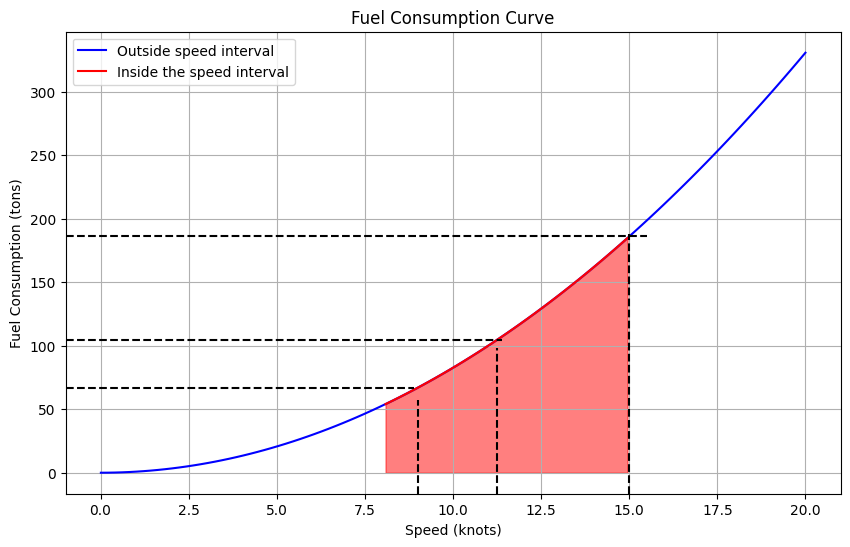

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Create a vector of velocities
v = np.linspace(0.01, 20, 100)

# Calculate the function values
# fc = (0.15 * (v / 14) ** 3) * 1080
# fc = 50.4 * (v / 14) ** 3
fc = (0.15*14 * (v/ 14) ** 3) * 1080/v


# Create a mask for the interval you want to be red
red_mask = (v >= 8) & (v <= 15)

# Proceed with the plot
plt.figure(figsize=(10, 6))
plt.plot(v, fc, 'b', label='Outside speed interval')  # Plot the entire curve in blue
plt.plot(v[red_mask], fc[red_mask], 'r', label='Inside the speed interval')  # Plot the red interval in red

# Fill the area under the red interval with a red shade
plt.fill_between(v, fc, where=red_mask, color='red', alpha=0.5)

# Speeds of interest
speeds = [9, 11.25, 15]
for speed in speeds:
    # Calculate the corresponding fuel consumption
    # fc_value = 0.15 * (speed / 14) ** 3 * 1080
    # fc_value = (50.4 * (v / 14) ** 3) 
    
    if speed == 9:
        fc_value = (0.15*14 * (speed/ 14) ** 3) * 1080/speed
        # fc_value = 50.4 * (speed / 14) ** 3 * 5
    elif speed == 11.25:
        fc_value = (0.15*14 * (speed/ 14) ** 3) * 1080/speed
        
        # fc_value = 50.4 * (speed / 14) ** 3 *4
    elif speed == 15:
        fc_value = (0.15*14 * (speed/ 14) ** 3) * 1080/speed
        
        # fc_value = 50.4 * (speed / 14) ** 3 *3
        
    
    
    # Plot the vertical line from the x-axis to the curve
    plt.axvline(x=speed, color='k', linestyle='--', ymin=0, ymax=(fc_value / max(fc)))
    
    # # Get the y value up to where the line should go
    # fc_line_max = fc_value / max(fc)
    
    # # Plot the vertical line from the x-axis to the curve
    # plt.axvline(x=speed, color='k', linestyle='--', ymin=0, ymax=fc_line_max)
    
    # # Plot the horizontal line from the curve to the y-axis
    # plt.axhline(y=fc_value, color='k', linestyle='--', xmin=0, xmax=speed / max(v))

    
    # Plot the horizontal line from the curve to the y-axis
    plt.axhline(y=fc_value, color='k', linestyle='--', xmin=0, xmax=(speed / max(v)))

# Adding labels and title
plt.xlabel('Speed (knots)')
plt.ylabel('Fuel Consumption (tons)')
plt.title('Fuel Consumption Curve')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


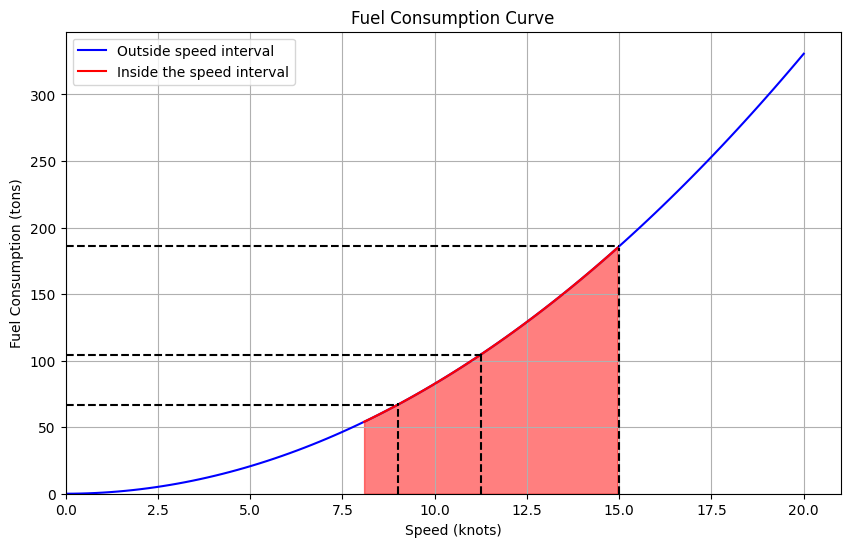

In [51]:
# The task is to fix the vertical and horizontal lines so they only extend to the curve, not beyond it.

# Function to calculate fuel consumption for a given speed
def calculate_fc(speed):
    return (0.15*14 * (speed / 14) ** 3) * 1080 / speed

# Proceed with the plot
plt.figure(figsize=(10, 6))
plt.plot(v, fc, 'b', label='Outside speed interval')  # Plot the entire curve in blue
plt.plot(v[red_mask], fc[red_mask], 'r', label='Inside the speed interval')  # Plot the red interval in red

# Fill the area under the red interval with a red shade
plt.fill_between(v, fc, where=red_mask, color='red', alpha=0.5)

# Speeds of interest
speeds = [9, 11.25, 15]
for speed in speeds:
    # Calculate the corresponding fuel consumption
    fc_value = calculate_fc(speed)
    
    # Find the index in the v array that is closest to the speed of interest
    index = np.abs(v-speed).argmin()
    
    # Plot the vertical line from the x-axis to the curve
    plt.vlines(x=speed, ymin=0, ymax=fc[index], colors='k', linestyles='--')
    
    # Plot the horizontal line from the curve to the y-axis
    plt.hlines(y=fc_value, xmin=0, xmax=speed, colors='k', linestyles='--')

# Adding labels and title
plt.xlabel('Speed (knots)')
plt.ylabel('Fuel Consumption (tons)')
plt.title('Fuel Consumption Curve')
plt.legend()
plt.grid(True)

# Setting the axis limits explicitly to make sure the axes start at zero
plt.xlim(left=0)
plt.ylim(bottom=0)

# Display the plot
plt.show()


In [46]:
fc_value = (0.15*14 * (9/ 14) ** 3) * 1080/9
fc_value

66.94897959183676

In [24]:
def calc_lb(ub, gap):
    return ub - gap*ub

In [8]:
calc_lb(2015775, 0.9242)

152795.74499999988

In [1]:
import pandas as pd

# Function to parse a line of the bounds history
def parse_line(line):
    parts = line.split(': ')
    time = float(parts[0])
    bounds = parts[1].split(', ')
    upper_bound = float(bounds[0])
    lower_bound = float(bounds[1])
    gap = float(bounds[2])
    return time, upper_bound, lower_bound, gap

# Read the bounds history from the file
bounds_history = []
with open('new_official_solutions/mirpso_results_LR1_1_DR1_4_VC3_V12a_45_noGR_noFILTER_LOCAL_PLOT.txt', 'r') as file:
    bounds_history_section = False
    for line in file:
        if line.strip() == "Bounds History:":
            bounds_history_section = True
            continue
        if bounds_history_section:
            if line.strip():  # Skip empty lines
                bounds_history.append(parse_line(line))

# Convert the data to a DataFrame
df = pd.DataFrame(bounds_history, columns=['Time', 'Upper Bound', 'Lower Bound', 'Gap'])

# Now you can use 'df' with your existing plotting code


In [2]:
df

,Time,Upper Bound,Lower Bound,Gap
0,151.086268,2.674297e+06,60185.711759,97.749476
1,151.086340,2.674297e+06,60185.711759,97.749476
2,151.086372,2.674297e+06,60185.711759,97.749476
3,151.086396,2.674297e+06,60185.711759,97.749476
4,151.086423,2.674297e+06,60185.711759,97.749476
...,...,...,...,...
1528588,10800.038156,1.961183e+06,905984.087065,53.804208
1528589,10800.038176,1.961183e+06,905984.087065,53.804208
1528590,10800.038207,1.961183e+06,905984.087065,53.804208
1528591,10800.038232,1.961183e+06,905984.087065,53.804208


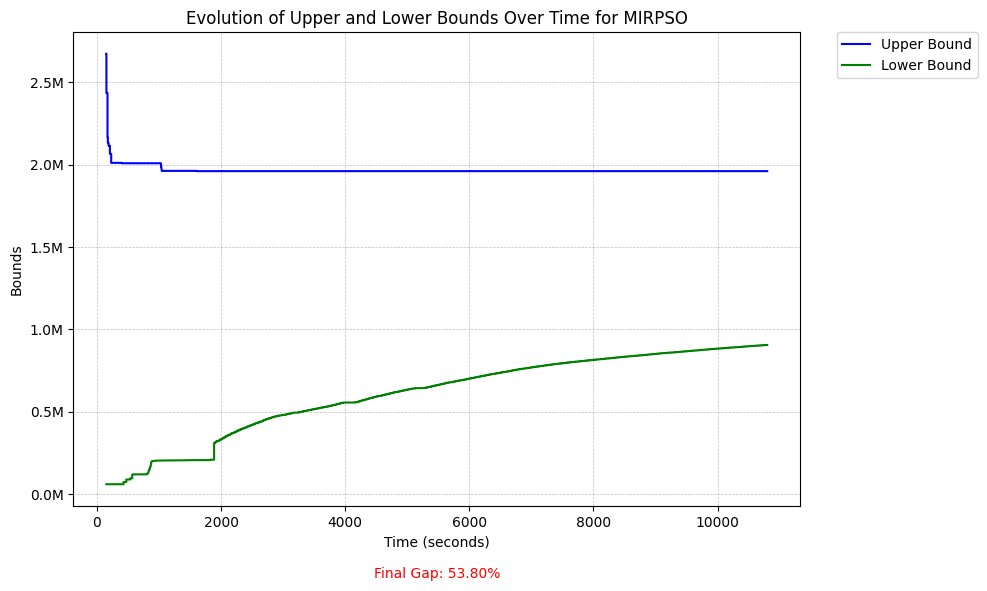

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format the y-axis labels
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

# Convert the data to a DataFrame
# df = pd.DataFrame(bounds_history, columns=['Time', 'Upper Bound', 'Lower Bound', 'Gap'])

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the upper and lower bounds
sns.lineplot(x='Time', y='Upper Bound', data=df, ax=ax, color='blue', label='Upper Bound')
sns.lineplot(x='Time', y='Lower Bound', data=df, ax=ax, color='green', label='Lower Bound')

# Set the title and labels
plt.title('Evolution of Upper and Lower Bounds Over Time for MIRPSO')
ax.set_ylabel('Bounds')
ax.set_xlabel('Time (seconds)')

# Add a grid
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Set the y-axis label formatter
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# # Annotate the final gap
final_gap = df['Gap'].iloc[-1]  # Get the last gap value
# plt.annotate(f'Final Gap: {final_gap:.2f}%', 
#              xy=(1, 0), xycoords='axes fraction', 
#              xytext=(-10, 10), textcoords='offset points',
#              horizontalalignment='right',
#              verticalalignment='bottom',
#              fontsize=10, color='red')

# Annotate the final gap
plt.annotate(f'Final Gap: {final_gap:.2f}%', 
             xy=(0.5, -0.1), xycoords='axes fraction', 
             xytext=(0, -10), textcoords='offset points',
             horizontalalignment='center',
             verticalalignment='top',
             fontsize=10, color='red')

# Adjust the legend to be outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0)

plt.tight_layout()
plt.show()


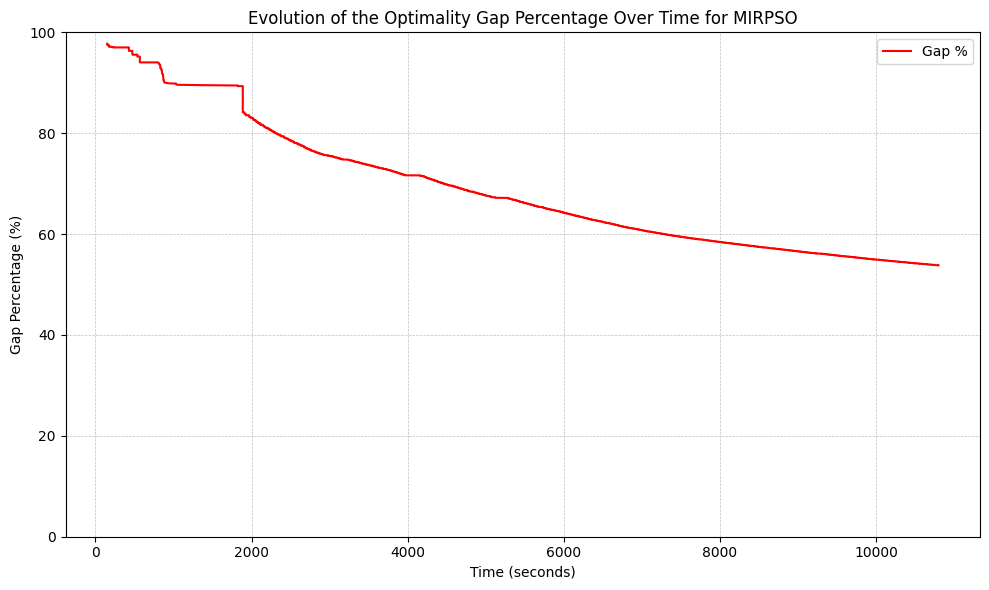

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the data to a DataFrame
# df = pd.DataFrame(bounds_history, columns=['Time', 'Upper Bound', 'Lower Bound', 'Gap'])

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the gap percentage over time
sns.lineplot(x='Time', y='Gap', data=df, ax=ax, color='red', label='Gap %')

# Set the title and labels
plt.title('Evolution of the Optimality Gap Percentage Over Time for MIRPSO')
ax.set_ylabel('Gap Percentage (%)')
ax.set_xlabel('Time (seconds)')

# Set y-axis limits from 0 to 100
ax.set_ylim(0, 100)

# Add a grid
ax.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)

# Adjust the legend
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [21]:
percentage_change = ((1009011 - 2669137 ) / 2669137 ) * 100
percentage_change

-62.197107154859424

In [22]:
(29.79+50.57+26.07+41.30+38.59+51.58)/6

39.650000000000006